<a href="https://colab.research.google.com/github/kevintg99/spacex-data-pipeline/blob/main/spacex_data_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import pandas as pd
import os

#fazendo o request na API
url = "https://api.spacexdata.com/v4/rockets"
response = requests.get(url)
data = response.json()

#organizando o arquivo json
df_rockets = pd.json_normalize(data)

#criando a pasta dos dados não tratados, se não tiver
os.makedirs("data/raw")

#salvando csv bruto
df_rockets.to_csv("data/raw/rockets_raw.csv", index=False)

print("salvo em data/raw/rockets_raw.csv")

salvo em data/raw/rockets_raw.csv


In [4]:
df_rockets.head()

,payload_weights,flickr_images,name,type,active,stages,boosters,cost_per_launch,success_rate_pct,first_flight,...,engines.number,engines.type,engines.version,engines.layout,engines.engine_loss_max,engines.propellant_1,engines.propellant_2,engines.thrust_to_weight,landing_legs.number,landing_legs.material
0,"[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...","[https://imgur.com/DaCfMsj.jpg, https://imgur....",Falcon 1,rocket,False,2,0,6700000,40,2006-03-24,...,1,merlin,1C,single,0.0,liquid oxygen,RP-1 kerosene,96.0,0,None
1,"[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://farm1.staticflickr.com/929/2878733830...,Falcon 9,rocket,True,2,0,50000000,98,2010-06-04,...,9,merlin,1D+,octaweb,2.0,liquid oxygen,RP-1 kerosene,180.1,4,carbon fiber
2,"[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://farm5.staticflickr.com/4599/385838292...,Falcon Heavy,rocket,True,2,2,90000000,100,2018-02-06,...,27,merlin,1D+,octaweb,6.0,liquid oxygen,RP-1 kerosene,180.1,12,carbon fiber
3,"[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://live.staticflickr.com/65535/489541389...,Starship,rocket,False,2,0,7000000,0,2021-12-01,...,37,raptor,,None,NaN,liquid oxygen,liquid methane,107.0,6,stainless steel


In [6]:
df_rockets.columns

Index(['payload_weights', 'flickr_images', 'name', 'type', 'active', 'stages',
       'boosters', 'cost_per_launch', 'success_rate_pct', 'first_flight',
       'country', 'company', 'wikipedia', 'description', 'id', 'height.meters',
       'height.feet', 'diameter.meters', 'diameter.feet', 'mass.kg', 'mass.lb',
       'first_stage.thrust_sea_level.kN', 'first_stage.thrust_sea_level.lbf',
       'first_stage.thrust_vacuum.kN', 'first_stage.thrust_vacuum.lbf',
       'first_stage.reusable', 'first_stage.engines',
       'first_stage.fuel_amount_tons', 'first_stage.burn_time_sec',
       'second_stage.thrust.kN', 'second_stage.thrust.lbf',
       'second_stage.payloads.composite_fairing.height.meters',
       'second_stage.payloads.composite_fairing.height.feet',
       'second_stage.payloads.composite_fairing.diameter.meters',
       'second_stage.payloads.composite_fairing.diameter.feet',
       'second_stage.payloads.option_1', 'second_stage.reusable',
       'second_stage.engines', 's

In [7]:
from datetime import datetime

#Lendo o csv bruto
df_rockets = pd.read_csv("data/raw/rockets_raw.csv")

#Puxando apenas as colunas importantes
df_rockets = df_rockets[
    [
        'name',
        'company',
        'first_flight',
        'active',
        'mass.kg',
        'height.meters',
        'cost_per_launch',
        'boosters',
        'engines.number',
        'engines.type',
        'country'
    ]
]

#a data veio em string. convertendo para formato DATE, o que der erro NAT
df_rockets['first_flight'] = pd.to_datetime(df_rockets['first_flight'], errors='coerce')

#criando idade do foguete (tempo do primeiro lançamento até agora)
current_year = datetime.now().year
df_rockets['rocket_age'] = current_year - df_rockets['first_flight'].dt.year

#calculando o custo por quilo
df_rockets['cost_per_kg'] = df_rockets['cost_per_launch'] / df_rockets['mass.kg']

#dando print pra ver
print(df_rockets.head())

           name company first_flight  active  mass.kg  height.meters  \
0      Falcon 1  SpaceX   2006-03-24   False    30146          22.25   
1      Falcon 9  SpaceX   2010-06-04    True   549054          70.00   
2  Falcon Heavy  SpaceX   2018-02-06    True  1420788          70.00   
3      Starship  SpaceX   2021-12-01   False  1335000         118.00   

   cost_per_launch  boosters  engines.number engines.type  \
0          6700000         0               1       merlin   
1         50000000         0               9       merlin   
2         90000000         2              27       merlin   
3          7000000         0              37       raptor   

                            country  rocket_age  cost_per_kg  
0  Republic of the Marshall Islands          19   222.251708  
1                     United States          15    91.065724  
2                     United States           7    63.345130  
3                     United States           4     5.243446  


In [8]:
#criando a pasta dos dados tratados, se não existir
os.makedirs("data/processed")

#salvando o csv tratado
df_rockets.to_csv("data/processed/rockets_clean.csv", index=False)

#print só de graça
print("Dados tratados salvos em data/processed/rockets_clean.csv")

Dados tratados salvos em data/processed/rockets_clean.csv


In [14]:
#desc
df_rockets.describe()

,first_flight,mass.kg,height.meters,cost_per_launch,boosters,engines.number,rocket_age,cost_per_kg
count,4,4.000000e+00,4.00000,4.000000e+00,4.0,4.000000,4.000000,4.000000
mean,2014-03-02 06:00:00,8.337470e+05,70.06250,3.842500e+07,0.5,18.500000,11.250000,95.476502
min,2006-03-24 00:00:00,3.014600e+04,22.25000,6.700000e+06,0.0,1.000000,4.000000,5.243446
25%,2009-05-16 18:00:00,4.193270e+05,58.06250,6.925000e+06,0.0,7.000000,6.250000,48.819709
50%,2014-04-06 00:00:00,9.420270e+05,70.00000,2.850000e+07,0.0,18.000000,11.000000,77.205427
75%,2019-01-20 12:00:00,1.356447e+06,82.00000,6.000000e+07,0.5,29.500000,16.000000,123.862220
max,2021-12-01 00:00:00,1.420788e+06,118.00000,9.000000e+07,2.0,37.000000,19.000000,222.251708
std,NaN,6.640021e+05,39.08984,3.994983e+07,1.0,16.441817,6.946222,91.771160


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('rockets_clean.csv')

Saving rockets_clean.csv to rockets_clean.csv


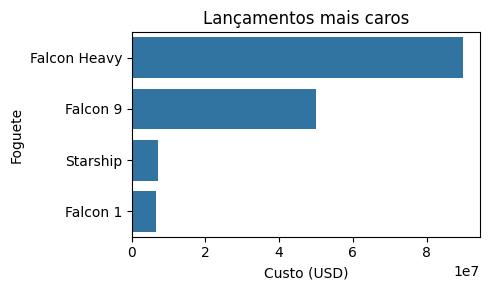

In [11]:
df_sorted = df.sort_values(by='cost_per_launch', ascending=False)  #Ordenando os rocket por custo
plt.figure(figsize=(5,3))#tamanho do grafico
sns.barplot(x='cost_per_launch', y='name', data=df_sorted)  #plotando o grafico
plt.title('Lançamentos mais caros')
plt.xlabel('Custo (USD)')
plt.ylabel('Foguete')
plt.tight_layout()  #ajustando o layout
plt.show()  #exibindo o gráfico


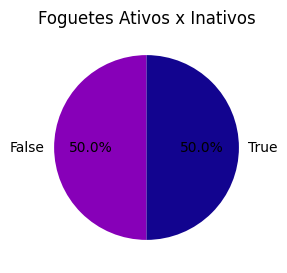

In [12]:
plt.figure(figsize=(5,3))
df['active'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#8700b8','#12048f'])  #grafico de pizza
plt.title('Foguetes Ativos x Inativos')
plt.ylabel('')  #não mostra o nome no gráfico
plt.show()  #mostrando o grafico
plt.close()